## Tweets viejos

In [7]:
import pandas as pd
import re
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import tweepy

from unicodedata import normalize




In [8]:
df_storm = pd.read_csv('tweets.csv', sep= ';')

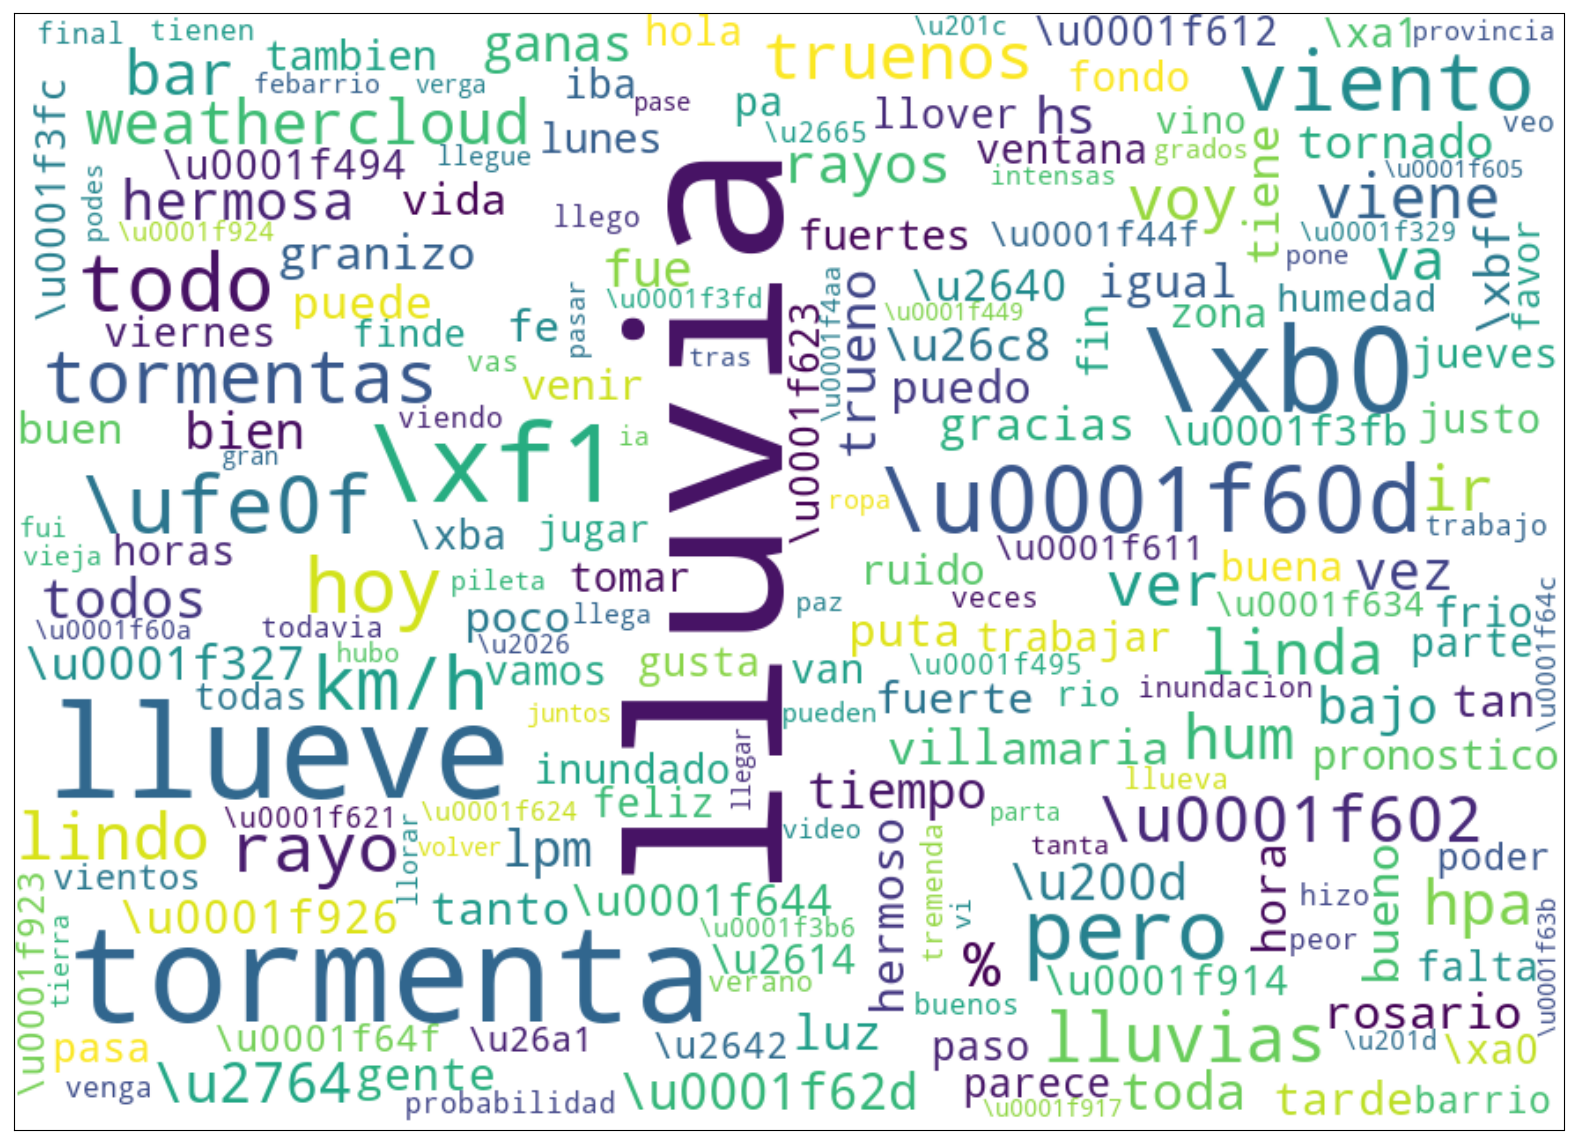

In [14]:
tweets_1 = df_storm.text
makeImage(diccionario(tweets_1)[1])

## Tweets nuevos

In [9]:

# Consumer keys and access tokens, used for OAuth
consumer_key = '56jUXGuw12Fg2aHsztCJJZoSU'
consumer_secret = 'f8UEUXfwAeN198l2HNghfYrKGLH7xB888WhS9p3ofJVgEDfKb8'
access_token = '331388192-Lr6itQp6fom5tN5yNy5UP9jey9qake7EkUWqC7lh'
access_token_secret = '8VuGuoMG4Dp5g3AMK9tErdpiFP2Jfxiaa32ZeV4N3DCGM'
 
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
# Creation of the actual interface, using authentication
#api = tweepy.API(auth)


In [10]:
api = tweepy.API(auth,wait_on_rate_limit_notify=True)

In [11]:
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Empe
Location: 
Friends: 9


In [10]:
msj = df.Message[:]

In [11]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

word_to_ix = {}
word_cant = []

for i,twit in enumerate(msj):
    
    txt = pattern.sub('',twit)
    nlist = txt.replace('\n','').replace('\u200d','').lower().split(' ')
    
    for word in nlist:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
            word_cant[word] = 1
        else: word_cant[word]+=1
            
vocab_size = len(word_to_ix)
num_labels = 2

    

TypeError: list indices must be integers or slices, not str

In [13]:
def scrapeo(hashtag,cantidad=1000,fecha='2017-09-10'):
    message,retweet_count,created_at,user_name,coord,geo,metadata=[],[],[],[],[],[],[]
    i = 0
    tweepy.Status
    for tweet in tweepy.Cursor(api.search,q="#"+str(hashtag),count = cantidad, lang = 'es', since = fecha,tweet_mode='extended').items():
        if 'RT' in tweet.full_text:
            continue
        message.append(tweet.full_text)
        retweet_count.append(tweet.retweet_count)
        created_at.append(tweet.created_at)
        user_name.append(tweet.user.name)
        coord.append(tweet.coordinates)
        geo.append(tweet.geo)
        metadata.append(tweet.metadata)
        i+=1
        if i%100 == 0: print (i,tweet.full_text)
        if i == 2000: break
    print (len(message),len(retweet_count),len(created_at),len(user_name),len(coord),len(geo))
    df=pd.DataFrame({'Message':message,
                    'Retweet Count':retweet_count,
                    'Created At':created_at,
                    'Username':user_name,
                     'Geo':geo,
                     'Coord':coord,
                     'Metadata':metadata
                    })
    df.to_csv("Twitter_%s.csv"%(hashtag))
    return(df)

    

In [6]:
msj_storm = df_storm.text[:]
t = msj[109723]


t = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", t), 0, re.I)
t = normalize( 'NFC', t)
k = 0
tt = t
for j,i in enumerate(t):
    if str(i).isascii()==False:
        print(i)
        tt = tt.replace(i,' '+i.encode('unicode-escape').decode('ASCII')+' ')
        print (tt)
print (tt)




NameError: name 'df_storm' is not defined

In [28]:
def diccionario (msj):
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    palabras_borradas = "so|o|su|vos|re|pq|le|te|tu|soy|sos|mi|da|n|c|m|o|u|x|s|les|me|d|q|1|2|3|4|5|6|7|8|9|0|e|como|lo|los|mi|son|donde|a|el|un|la|una|en|por|para|ante|si|sobre|sin|al|rt|del|y|se|de|que|sus|ha|es|con|esta|ni|no"
    word_to_ix = {}
    word_cant = {}
    emoji = []
    emoji_ix = {}
    emoji_cant = {}

    for i,twit in enumerate(msj):

        txt = pattern.sub('',twit)
        txt = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", txt), 0, re.I)
        txt = normalize( 'NFC', txt)
        txt = txt.replace('\n','').replace('\ufe0f','').replace('+','').replace('?','').replace('▯','').replace('(','').replace('|','').replace('!','').replace(')','').replace('.','').replace('-','').replace('_','').replace(',','').replace('#','').replace(':','')
        tt = txt
        for i in txt:
            if str(i).isascii()==False:
                tt = tt.replace(i,' '+i.encode('unicode-escape').decode('ASCII')+' ')
                emoji.append(i)
        txt = tt
                
        nlist = txt.lower().split(' ')


        for word in nlist:
            
            
            if re.match(palabras_borradas, word):
                continue
            if ('@' in word) and ('RELAMPAGO2018' not in word) and ('RELAMPAGO_edu' not in word) or ('jaj' in word):
                continue

            
            if word not in word_to_ix:
                word_to_ix[word] = len(word_to_ix)
                word_cant[word]  = 1
            else: word_cant[word]+=1
        for emo in emoji:
            if emo not in emoji_ix:
                emoji_ix[emo] = len(emoji_ix)
                emoji_cant[emo]  = 1
            else: emoji_cant[emo]+=1
                
    vocab_size = len(word_to_ix)
    num_labels = 2
    #print(emoji)

    return(word_to_ix,word_cant,emoji_ix,emoji_cant)

def makeImage(text):
    alice_mask = np.array(Image.open("cord.jpeg"))

    wc = WordCloud(background_color="white", max_words=200, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    fig = plt.figure(figsize=(20,20),dpi=100)
    plt.imshow(wc, interpolation="bilinear",cmap=plt.get_cmap("coolwarm"))
    #plt.axis("off")
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft = False)
    #plt.show()
    plt.savefig('Multiword')

KeyError: 0

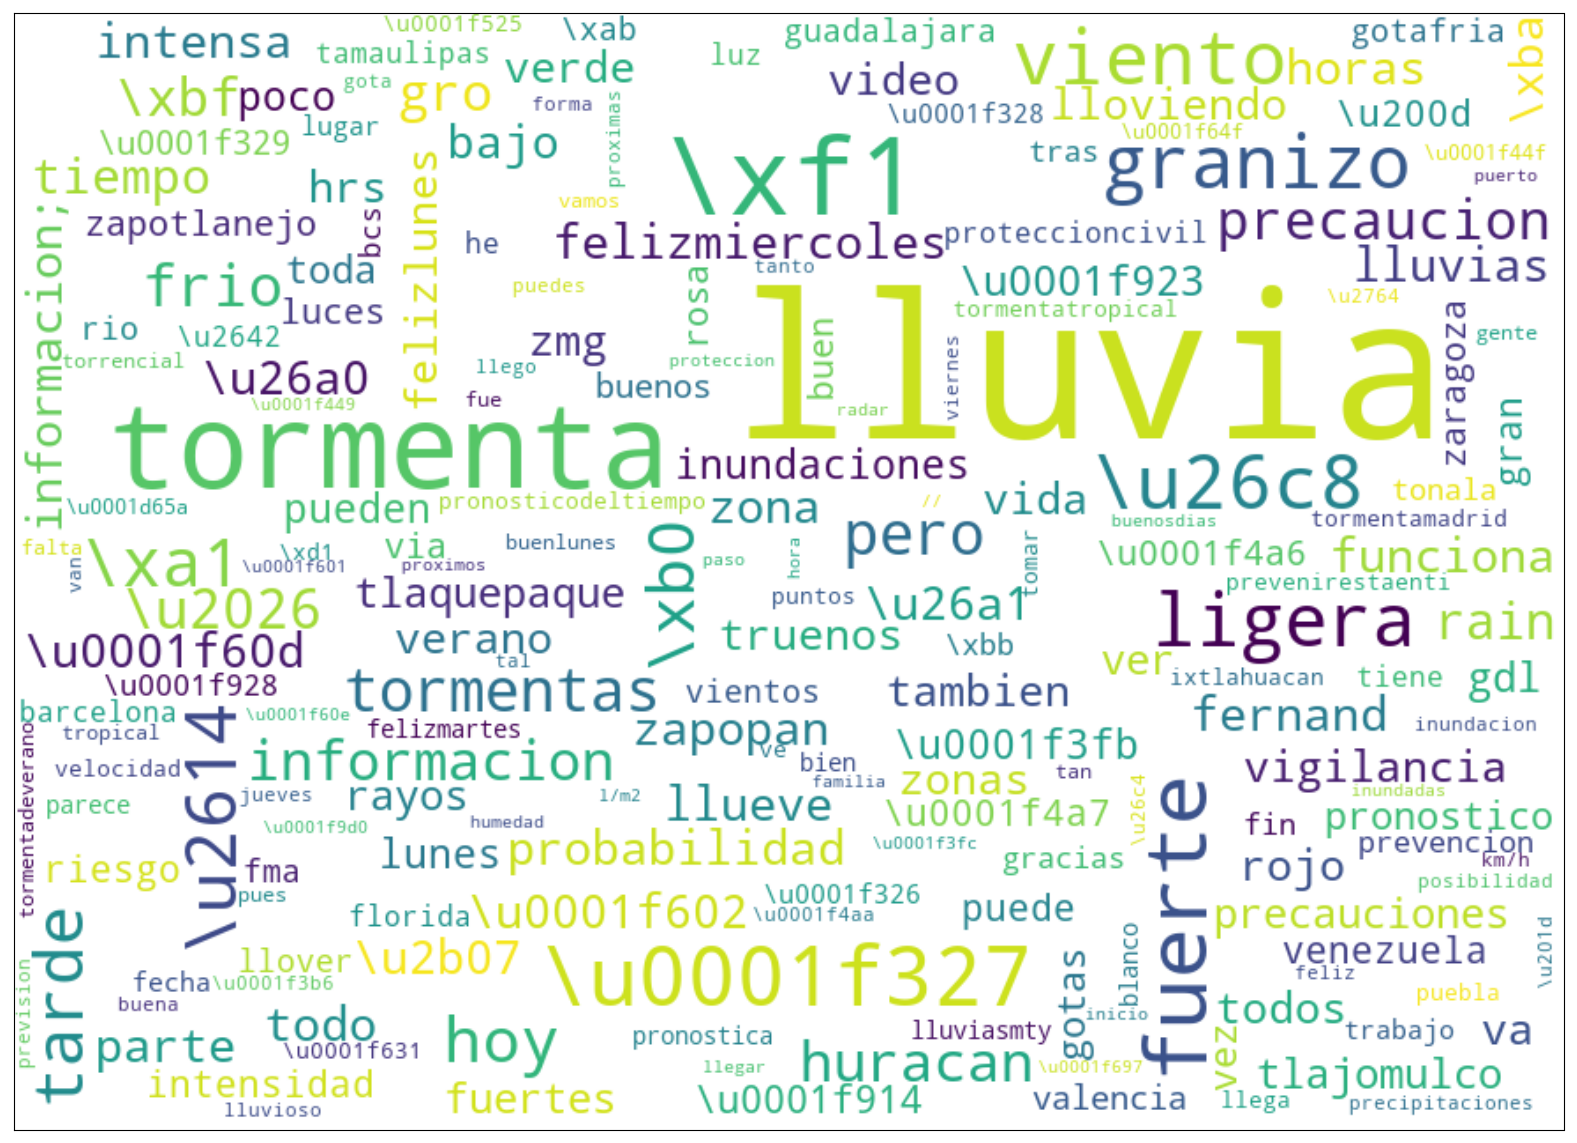

In [32]:
sc = pd.read_csv('Twitter_Lluvia.csv')
dick = diccionario(sc['Message'])
makeImage(dick[1])
print(dick[2][max(dick[3])])

In [45]:
dick[2]

{'¡': 0,
 '☕': 1,
 '❤': 2,
 '☔': 3,
 '🌧': 4,
 '⛈': 5,
 '“': 6,
 '”': 7,
 '👉': 8,
 '🏻': 9,
 '😰': 10,
 'ñ': 11,
 '😍': 12,
 '♥': 13,
 '🌏': 14,
 '🏡': 15,
 '🛏': 16,
 '😁': 17,
 '☀': 18,
 '📝': 19,
 '🌨': 20,
 '🤭': 21,
 '🐷': 22,
 '😩': 23,
 '😢': 24,
 '⚠': 25,
 '🙋': 26,
 '\u200d': 27,
 '♂': 28,
 '🤷': 29,
 '🚣': 30,
 '🤦': 31,
 '¿': 32,
 '🌩': 33,
 '🤙': 34,
 '✏': 35,
 '😛': 36,
 '’': 37,
 '😎': 38,
 '😳': 39,
 '😐': 40,
 '👏': 41,
 '🏼': 42,
 '🙌': 43,
 '💃': 44,
 '…': 45,
 '🐱': 46,
 '💪': 47,
 '🌦': 48,
 '🥰': 49,
 '🐶': 50,
 '😂': 51,
 '😡': 52,
 '😸': 53,
 '☝': 54,
 '😌': 55,
 '😱': 56,
 '🧰': 57,
 '📻': 58,
 '🔦': 59,
 '🧾': 60,
 '📞': 61,
 '📱': 62,
 '🚰': 63,
 '🥫': 64,
 '💻': 65,
 '♻': 66,
 '⚡': 67,
 '📺': 68,
 '🕯': 69,
 '🚔': 70,
 '🚑': 71,
 '🚒': 72,
 '👪': 73,
 '👟': 74,
 '💦': 75,
 '💨': 76,
 '🥺': 77,
 '🥞': 78,
 '😉': 79,
 '🙏': 80,
 '°': 81,
 '➡': 82,
 '🙇': 83,
 '🙄': 84,
 '🐿': 85,
 'Ñ': 86,
 '⛄': 87,
 '🔥': 88,
 '💧': 89,
 '🚩': 90,
 '🖤': 91,
 '📌': 92,
 '🚗': 93,
 '😘': 94,
 '😔': 95,
 '🎸': 96,
 '🎧': 97,
 '✌': 98,
 '😝': 99,
 '☎':

In [2]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

file= '../eci2019-nlp/TP/eci2019nlp/fastText-0.9.1/cc.es.300.bin'

In [3]:
f = io.open(file)

In [5]:
f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 0: invalid start byte